# Programming with Self-Attention

This notebook is based on the [blog post by Sasha Rush](https://srush.github.io/raspy/).

In [1]:
!pip install -qqq git+https://github.com/chalk-diagrams/chalk git+https://github.com/srush/RASPy 

In [2]:
from raspy import *
import raspy.visualize
from chalk import *

# Where We're Going

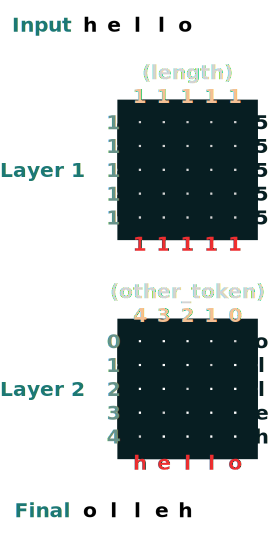

In [3]:
raspy.visualize.EXAMPLE = 'hello'
def flip():
    length = (key(1) == query(1)).value(1).name("length")
    flipped = (key(length - indices - 1) == query(indices)).value(tokens).name("other_token")
    return flipped
flip()

# Section 1: Feed-Forward Network

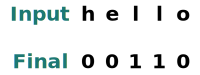

In [4]:
(tokens == 'l')

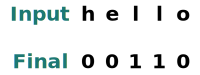

In [5]:
((indices > 1) & (indices <= 3))

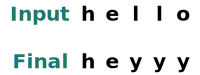

In [6]:
where(indices >= 2, "y", tokens)

Exercise:

- Replace every 'e' with 'A'
- Replace the first token with 'B'
- For everything else (i.e., that isn't an e or the first token) output 'C'

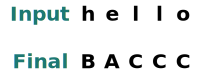

In [7]:
# your code here
where(tokens == 'e', 'A', where(indices == 0, 'B', 'C'))

# Section 2: Keys and Queries

In [8]:
key(tokens)

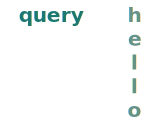

In [9]:
query(tokens)

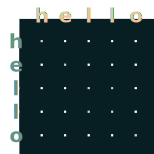

In [10]:
key(tokens) == query(tokens)

Scalars broadcast to the length of the sequence.

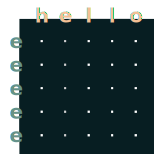

In [11]:
key(tokens) == query('e')

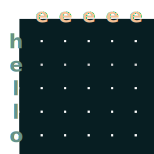

In [12]:
key('e') == query(tokens)

**Example**: Count `e`s.

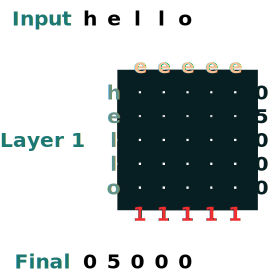

In [13]:
(key('e') == query(tokens)).value(1)

Exercise: Explain to your partners what the values on the *top* and *left* of the grid mean. (You might also think about the bottom and right values, but don't worry if you don't get them quite yet.)

Exercise: predict the result of the following cell. Discuss your prediction with your partners. Then, uncomment it and check your prediction. Discuss what you learned.

In [14]:
# (key(tokens) == query('e')).value(1)

Exercise: `length`.

1. Explain to your partners: why does the following code compute the length of the input sequence?
2. Change it so that only the first token gets the sequence length.

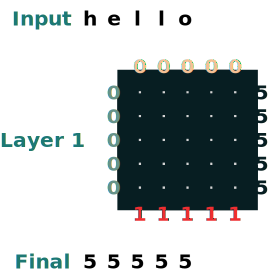

In [15]:
(key(0) == query(0)).value(1)

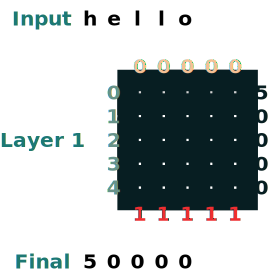

In [16]:
# your code here
(key(0) == query(indices)).value(1)

Exercise: **histogram**.

For each token, output how many times that token occurs in the sequence.

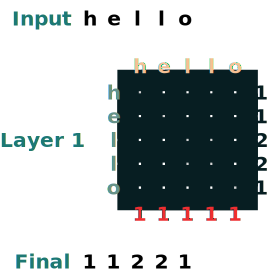

In [17]:
# your code here
(key(tokens) == query(tokens)).value(1)

Example: a selector that matches each output position to all earlier input positions.

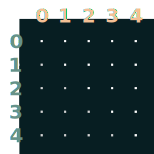

In [18]:
before = key(indices) < query(indices)
before

# Section 3: Values (other than 1)

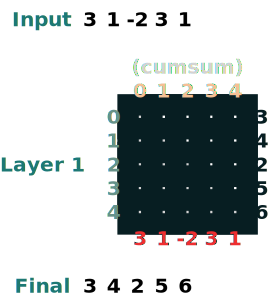

In [19]:
def cumsum(seq=tokens):
    return (key(indices) <= query(indices)).value(seq).name("cumsum")
cumsum().input([3, 1, -2, 3, 1])

Exercise: Explain to your partners what the values on the *bottom* and *right* of the grid mean.

Exercise: pattern detect

Detect all instances of vowel-consonant.

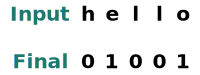

In [20]:
vowel = tokens.map(lambda tok: tok in 'aeiou')
vowel

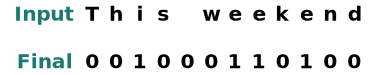

In [21]:
example = list("This weekend")
vowel.input(example)

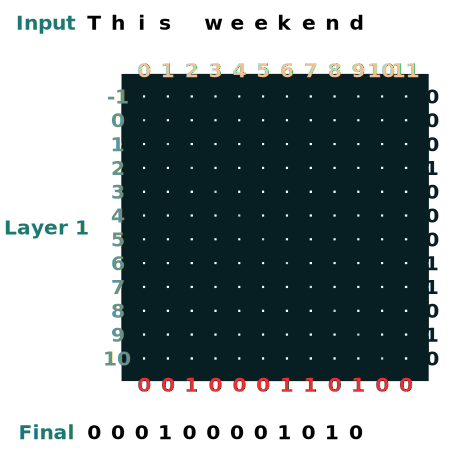

In [22]:
# your code here
prev_is_vowel = (key(indices) == query(indices - 1)).value(vowel, 0)
((~vowel) & prev_is_vowel).input(example)